Нейрон с различными функциями активации

In [11]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [12]:

# Общие функции
def Loss(y_pred, y):
    y_pred = y_pred.reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)
    return 0.5 * np.mean((y_pred - y) ** 2)

y_pred =
 [[ 9.]
 [12.]
 [ 0.]]

Updated weights:
w =
 [[0.94666667]
 [1.88      ]]
b =
 1.9666666666666666
Epoch    0/10000 | Loss: 0.1415
Epoch  500/10000 | Loss: 0.0296
Epoch 1000/10000 | Loss: 0.0227
Epoch 1500/10000 | Loss: 0.0215
Epoch 2000/10000 | Loss: 0.0214
Epoch 2500/10000 | Loss: 0.0213
Epoch 3000/10000 | Loss: 0.0213
Epoch 3500/10000 | Loss: 0.0213
Epoch 4000/10000 | Loss: 0.0213
Epoch 4500/10000 | Loss: 0.0213
Epoch 5000/10000 | Loss: 0.0213
Epoch 5500/10000 | Loss: 0.0213
Epoch 6000/10000 | Loss: 0.0213
Epoch 6500/10000 | Loss: 0.0213
Epoch 7000/10000 | Loss: 0.0213
Epoch 7500/10000 | Loss: 0.0213
Epoch 8000/10000 | Loss: 0.0213
Epoch 8500/10000 | Loss: 0.0213
Epoch 9000/10000 | Loss: 0.0213
Epoch 9500/10000 | Loss: 0.0213
Epoch 9999/10000 | Loss: 0.0213


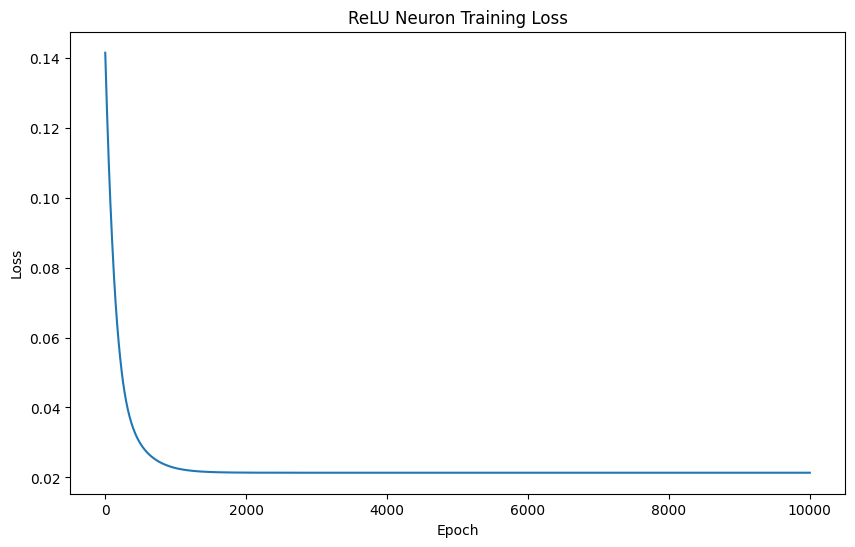

Accuracy: 0.9670
Precision: 0.9469
Recall: 1.0000
F1-score: 0.9727

Confusion Matrix:
[[379  33]
 [  0 588]]


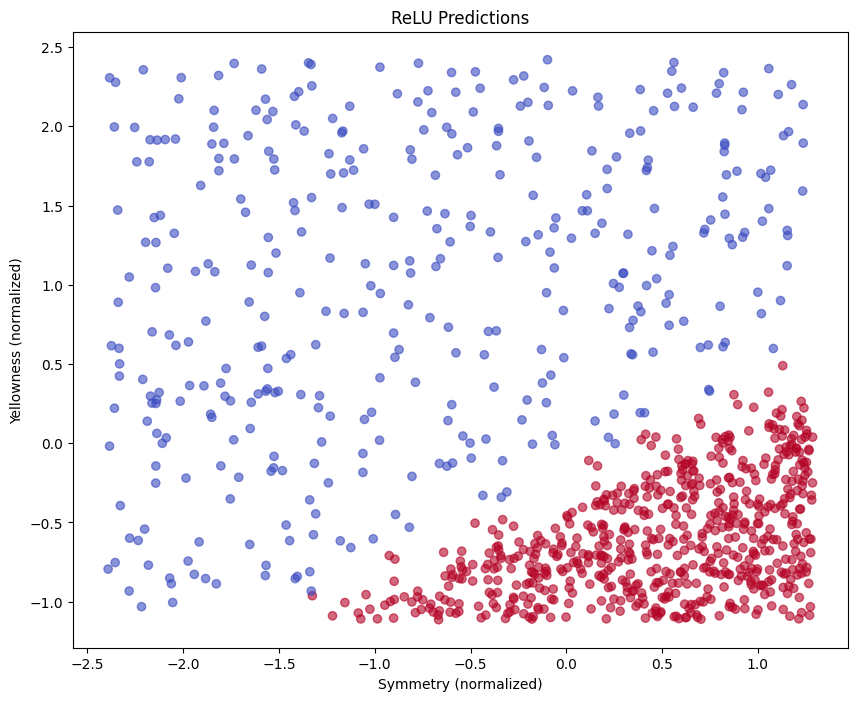

In [13]:
# Реализация для ReLU
def relu(x):
    """ReLU-функция"""
    return np.maximum(0, x)

def relu_derivative(x):
    """Производная ReLU"""
    return (x > 0).astype(float)

class NeuronReLU:
    def __init__(self, w=None, b=0):
        self.w = w if w is not None else None
        self.b = b
        self.z = None  # Для сохранения пред-активационных значений
        
    def activate(self, x):
        return relu(x)
        
    def forward_pass(self, X):
        self.z = X @ self.w + self.b  # Сохраняем z
        return self.activate(self.z)
    
    def backward_pass(self, X, y, y_pred, learning_rate=0.005):
        n = len(y)
        error = y_pred - y.reshape(-1, 1)
        # Используем сохраненное значение z
        grad_w = X.T @ (error * relu_derivative(self.z)) / n
        grad_b = np.mean(error * relu_derivative(self.z))
        self.w -= learning_rate * grad_w
        self.b -= learning_rate * grad_b
    
    def fit(self, X, y, num_epochs=300):
        if self.w is None:
            self.w = np.zeros((X.shape[1], 1))
        self.b = 0
        Loss_values = []
        
        for epoch in range(num_epochs):
            y_pred = self.forward_pass(X)  # z сохраняется здесь
            loss = Loss(y_pred, y)
            Loss_values.append(loss)
            
            self.backward_pass(X, y, y_pred, learning_rate=0.005)
            
            if epoch % 500 == 0 or epoch == num_epochs-1:
                print(f"Epoch {epoch:4d}/{num_epochs} | Loss: {loss:.4f}")
                
        return Loss_values

# Проверка реализации
w = np.array([1., 2.]).reshape(2, 1)
b = 2.
X = np.array([[1., 3.], [2., 4.], [-1., -3.2]])
neuron = NeuronReLU(w, b)
y_pred = neuron.forward_pass(X)
print("y_pred =\n", y_pred)

y = np.array([1, 0, 1]).reshape(3, 1)
neuron.backward_pass(X, y, y_pred)
print("\nUpdated weights:")
print("w =\n", neuron.w)
print("b =\n", neuron.b)

# Загрузка данных
data = pd.read_csv("/home/admin/Документы/!PLEHA/LAB /II_LABS/LABS_II/LABII/apple_pear.csv")
X = data.iloc[:, :2].values
y = data['target'].values.reshape(-1, 1)
X = (X - X.mean(axis=0)) / X.std(axis=0)  # Нормализация

# Обучение модели
model = NeuronReLU(w=np.random.randn(2, 1), b=np.random.randn(1))
losses = model.fit(X, y, num_epochs=10000)

# Визуализация потерь
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('ReLU Neuron Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Метрики качества
def evaluate(y_true, y_pred):
    y_pred_class = (y_pred > 0.5).astype(int)
    print(f'Accuracy: {accuracy_score(y_true, y_pred_class):.4f}')
    print(f'Precision: {precision_score(y_true, y_pred_class):.4f}')
    print(f'Recall: {recall_score(y_true, y_pred_class):.4f}')
    print(f'F1-score: {f1_score(y_true, y_pred_class):.4f}')
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_true, y_pred_class))

y_pred = model.forward_pass(X)
evaluate(y, y_pred)

# Визуализация предсказаний
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=(y_pred > 0.5).ravel(), cmap='coolwarm', alpha=0.6)
plt.title('ReLU Predictions')
plt.xlabel('Symmetry (normalized)')
plt.ylabel('Yellowness (normalized)')
plt.show()


Epoch    0/10000 | Loss: 0.0785
Epoch  500/10000 | Loss: 0.0268
Epoch 1000/10000 | Loss: 0.0232
Epoch 1500/10000 | Loss: 0.0222
Epoch 2000/10000 | Loss: 0.0218
Epoch 2500/10000 | Loss: 0.0217
Epoch 3000/10000 | Loss: 0.0216
Epoch 3500/10000 | Loss: 0.0215
Epoch 4000/10000 | Loss: 0.0214
Epoch 4500/10000 | Loss: 0.0214
Epoch 5000/10000 | Loss: 0.0214
Epoch 5500/10000 | Loss: 0.0214
Epoch 6000/10000 | Loss: 0.0214
Epoch 6500/10000 | Loss: 0.0214
Epoch 7000/10000 | Loss: 0.0214
Epoch 7500/10000 | Loss: 0.0214
Epoch 8000/10000 | Loss: 0.0213
Epoch 8500/10000 | Loss: 0.0213
Epoch 9000/10000 | Loss: 0.0213
Epoch 9500/10000 | Loss: 0.0213
Epoch 9999/10000 | Loss: 0.0213
Accuracy: 0.9670
Precision: 0.9469
Recall: 1.0000
F1-score: 0.9727

Confusion Matrix:
[[379  33]
 [  0 588]]


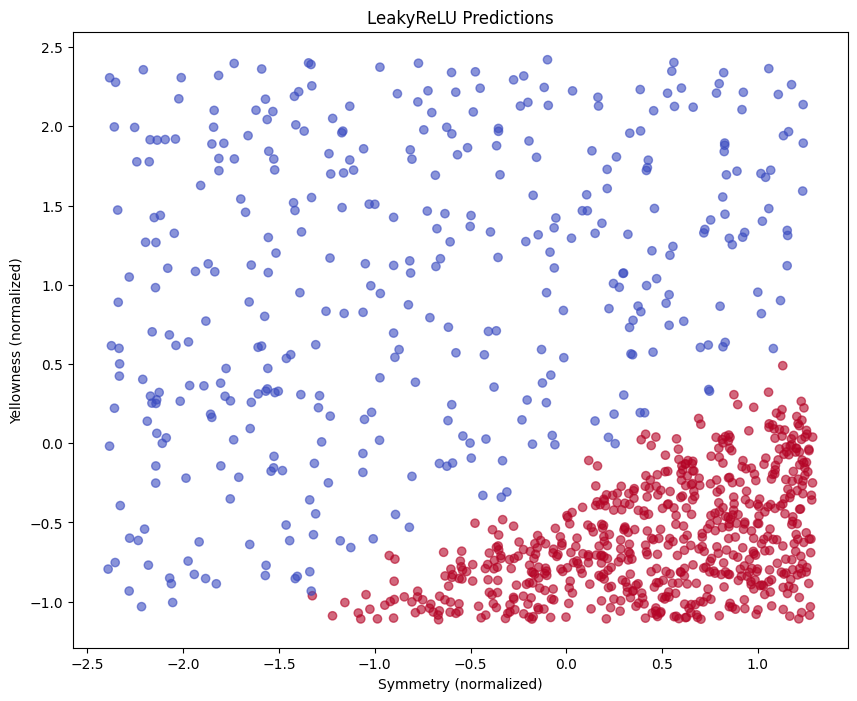

Epoch    0/10000 | Loss: 0.1598
Epoch  500/10000 | Loss: 0.0678
Epoch 1000/10000 | Loss: 0.0532
Epoch 1500/10000 | Loss: 0.0455
Epoch 2000/10000 | Loss: 0.0402
Epoch 2500/10000 | Loss: 0.0361
Epoch 3000/10000 | Loss: 0.0329
Epoch 3500/10000 | Loss: 0.0302
Epoch 4000/10000 | Loss: 0.0281
Epoch 4500/10000 | Loss: 0.0264
Epoch 5000/10000 | Loss: 0.0251
Epoch 5500/10000 | Loss: 0.0241
Epoch 6000/10000 | Loss: 0.0233
Epoch 6500/10000 | Loss: 0.0227
Epoch 7000/10000 | Loss: 0.0223
Epoch 7500/10000 | Loss: 0.0220
Epoch 8000/10000 | Loss: 0.0218
Epoch 8500/10000 | Loss: 0.0216
Epoch 9000/10000 | Loss: 0.0215
Epoch 9500/10000 | Loss: 0.0215
Epoch 9999/10000 | Loss: 0.0214
Accuracy: 0.9710
Precision: 0.9530
Recall: 1.0000
F1-score: 0.9759

Confusion Matrix:
[[383  29]
 [  0 588]]


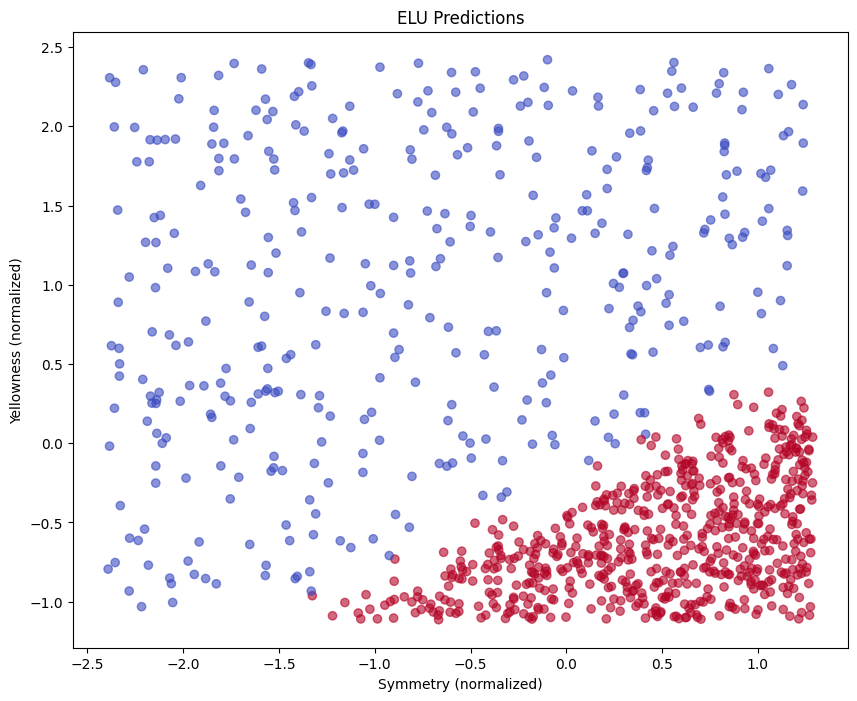

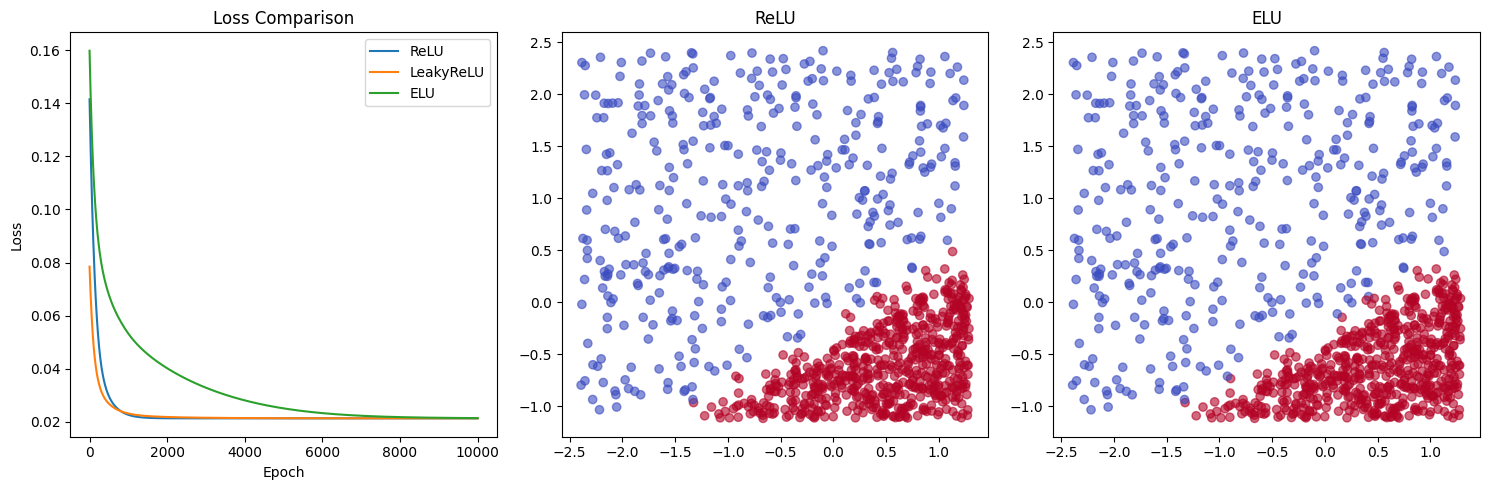

In [16]:

# Реализация для LeakyReLU
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

class NeuronLeakyReLU(NeuronReLU):
    def activate(self, x):
        return leaky_relu(x)
    
    def backward_pass(self, X, y, y_pred, learning_rate=0.005):
        n = len(y)
        error = y_pred - y.reshape(-1, 1)
        grad_w = X.T @ (error * leaky_relu_derivative(self.z)) / n
        grad_b = np.mean(error * leaky_relu_derivative(self.z))
        self.w -= learning_rate * grad_w
        self.b -= learning_rate * grad_b

# Обучение LeakyReLU
model_leaky = NeuronLeakyReLU(w=np.random.randn(2, 1), b=np.random.randn(1))
losses_leaky = model_leaky.fit(X, y, num_epochs=10000)

# Визуализация и метрики для LeakyReLU
y_pred_leaky = model_leaky.forward_pass(X)
evaluate(y, y_pred_leaky)

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=(y_pred_leaky > 0.5).ravel(), cmap='coolwarm', alpha=0.6)
plt.title('LeakyReLU Predictions')
plt.xlabel('Symmetry (normalized)')
plt.ylabel('Yellowness (normalized)')
plt.show()

# Реализация для ELU
def elu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def elu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, elu(x, alpha) + alpha)

class NeuronELU(NeuronReLU):
    def activate(self, x):
        return elu(x)
    
    def backward_pass(self, X, y, y_pred, learning_rate=0.005):
        n = len(y)
        error = y_pred - y.reshape(-1, 1)
        grad_w = X.T @ (error * elu_derivative(self.z)) / n
        grad_b = np.mean(error * elu_derivative(self.z))
        self.w -= learning_rate * grad_w
        self.b -= learning_rate * grad_b

# Обучение ELU
model_elu = NeuronELU(w=np.random.randn(2, 1), b=np.random.randn(1))
losses_elu = model_elu.fit(X, y, num_epochs=10000)

# Визуализация и метрики для ELU
y_pred_elu = model_elu.forward_pass(X)
evaluate(y, y_pred_elu)

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=(y_pred_elu > 0.5).ravel(), cmap='coolwarm', alpha=0.6)
plt.title('ELU Predictions')
plt.xlabel('Symmetry (normalized)')
plt.ylabel('Yellowness (normalized)')
plt.show()

# Сравнение всех моделей
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(losses, label='ReLU')
plt.plot(losses_leaky, label='LeakyReLU')
plt.plot(losses_elu, label='ELU')
plt.legend()
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=(y_pred > 0.5).ravel(), cmap='coolwarm', alpha=0.6)
plt.title('ReLU')

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=(y_pred_elu > 0.5).ravel(), cmap='coolwarm', alpha=0.6)
plt.title('ELU')
plt.tight_layout()
plt.show()


In [17]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>